In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [2]:
col_names = ['Sex','School','Grade','Income','Domicile','label']
# load dataset
pima = pd.read_csv("PJ.csv", header=None, names=col_names)

In [3]:
pima.head()

,Sex,School,Grade,Income,Domicile,label
0,1,1,2.61,6,1,1
1,2,2,3.22,2,1,1
2,1,1,3.55,1,1,1
3,1,1,2.55,5,1,1
4,1,1,3.15,3,1,0


In [4]:
#split dataset in features and target variable
feature_cols = ['Sex','School','Grade','Income','Domicile']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8611111111111112


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        37
           1       0.79      0.97      0.87        35

    accuracy                           0.86        72
   macro avg       0.88      0.86      0.86        72
weighted avg       0.88      0.86      0.86        72

[[28  9]
 [ 1 34]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


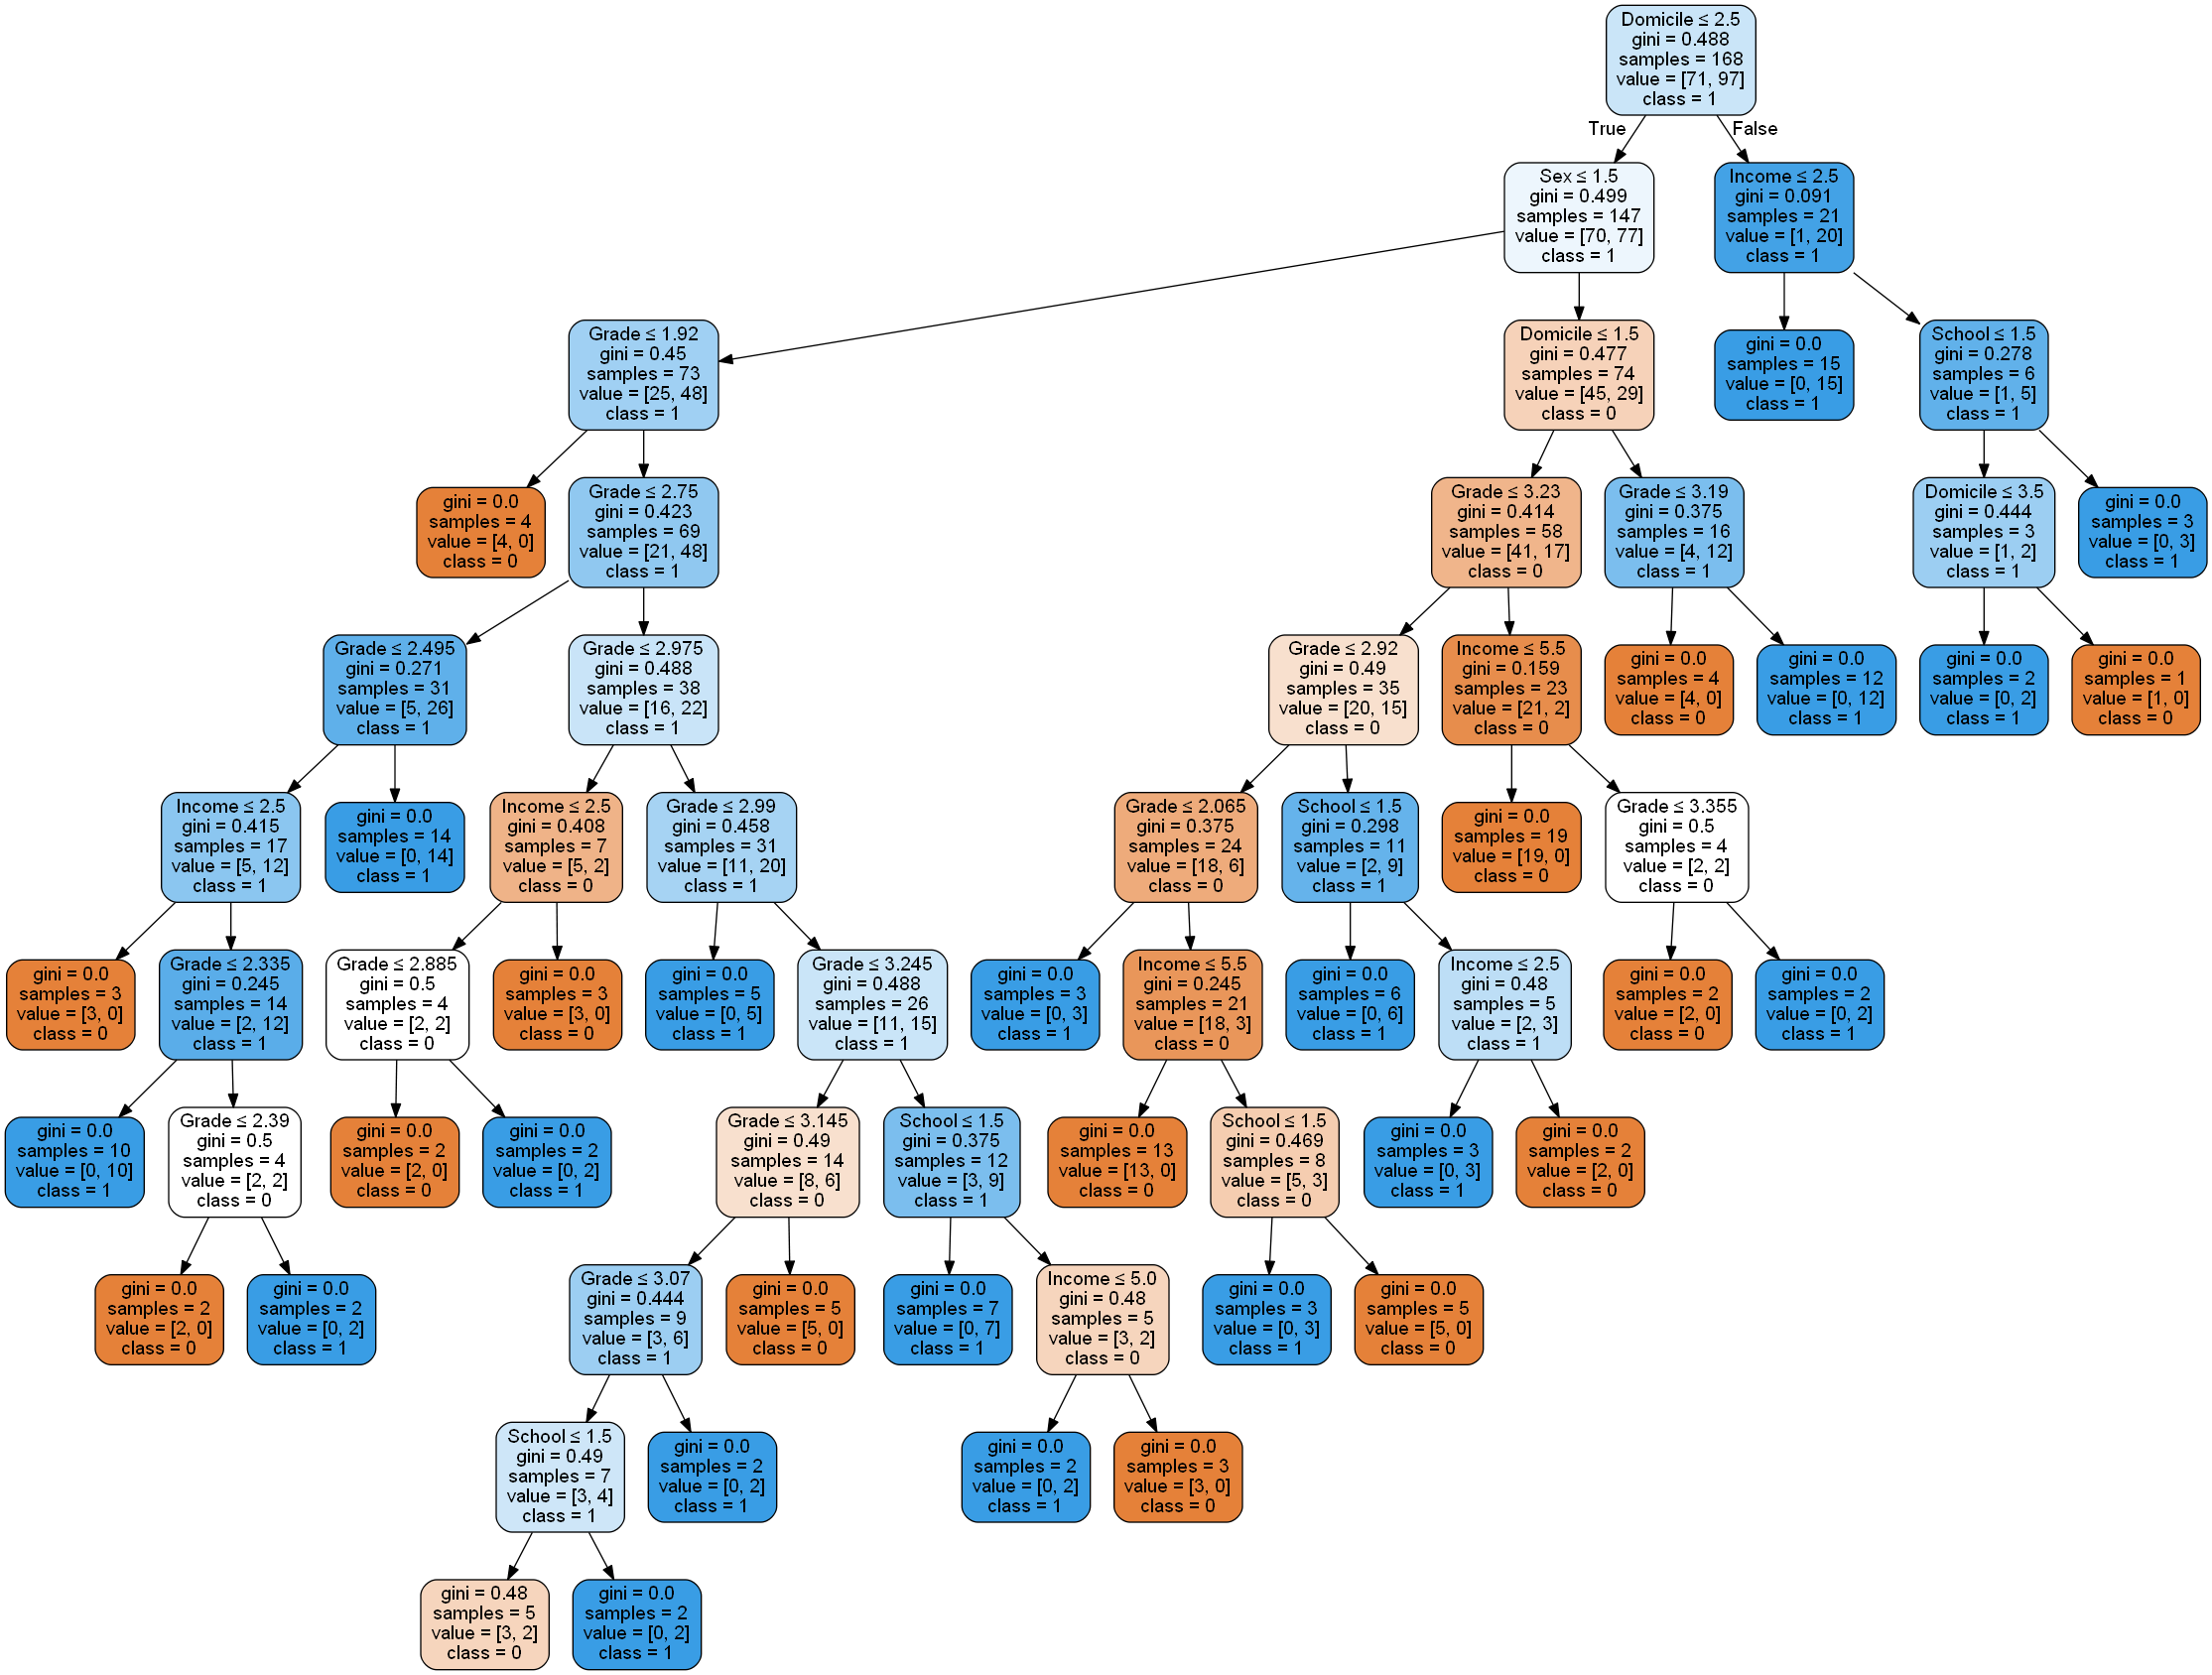

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes01.png')
Image(graph.create_png())